In [120]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from torch import nn # contains all the building blocks for neural networks

# Data Preperation


In [121]:
# create a linear regression like
weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weights * X + bias

# Data Split To Train And Test Set

In [122]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

 

# Data Visualisation

In [123]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize=(10,7))

    # plot train data in blue
    plt.scatter(train_data,train_labels, c = 'b', s = 4, label = 'Training Data')

    # plot test data in green
    plt.scatter(test_data,test_labels, c = 'g', s = 4, label = 'Test data')

    # are there predictions?
    if predictions != None:
        plt.scatter(test_data,predictions, c = 'r', s =4, label = 'predictions')

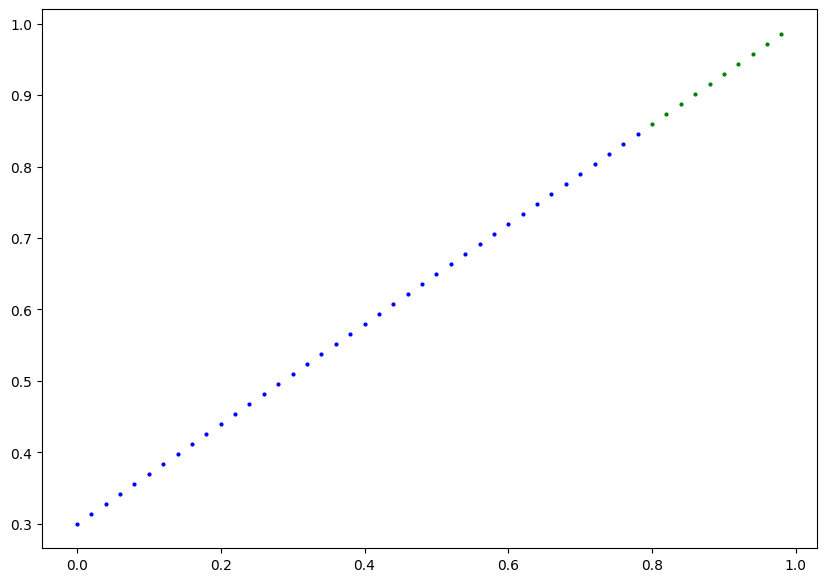

In [124]:
plot_predictions()

# Build Model

In [125]:
from torch import nn

# Creating a Linear Regression Class
class LinearRegressionClass(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    
    # to define the computation in the model
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias 



# Checking the contents of Pytorch model
use '.parameters' to check whats inside the model


In [126]:
# create a random seed to understand values
torch.manual_seed(42)

# create an object of Linear regression class
model_0 = LinearRegressionClass()

# check parameters
list(model_0.parameters())

# list of named parameters -> provides the dictionaries of the parameters of the mdodels
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [127]:
# premise of deep learning is to start with random values and get close to these actual values. 
weights, bias

(0.7, 0.3)

# Make predictions to check how bad the model is

In [128]:
# use torch.inference_mode()
with torch.inference_mode():
    baseline_y_preds = model_0(X_test)

baseline_y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

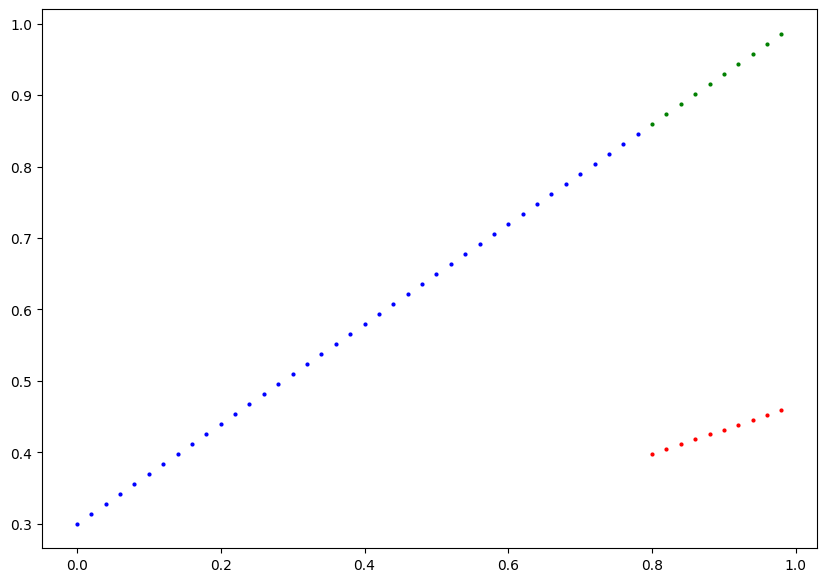

In [129]:
# we can obsere that with the random weights and bias the predictions are very bad. 
plot_predictions(predictions = baseline_y_preds)

# Training

The whole idea of training is for model to move from unknown parameters to good parameters. Move from bad representation of data to good representation of data.

Things we need to train:
* **Loss function**: A function to measure how wrong the models predictions are to the ideal outputs. Lower is better
* **optimizer**: Takes into account the loss of a model and adjust the parameters(weights and biases) to improve the loss the function.
    * inside the optimizer you have two set of parameters:
        * params - the model parameters that you would like to optimize
        * learning rate  - how big the each step needs to be while optimizing.

In Pytorch we need:
* Training loop
* Testing loop

Training loop: 
1. Loop through the data
2. set to training mode - this sets grad = true. It allows tracking of gradients.
3. Forward pass
4. Calculate the loss (compare the forward pass results with ground truth labels)
5. Optimize the zero grad
6. Loss backwards - move backwards through the network to calculate the gradients of each parameter with respect to the loss
7. optimizer step - use the optimizer to adjust the parameters and improve the loss (** Gradient Descent **)


In [130]:
# See the parameters
model_0.state_dict()

# set a loss function
loss_fn = torch.nn.L1Loss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01) # learning rate

In [131]:
# Building a training loop
# epoch is one loop through the data

epochs = 200

# define list store values
epoch_values = []
train_loss_values = []
test_loss_values = []
for epoch in range(epochs):
    # set the model to training model. this sets grad = True
    model_0.train()

    # forward pass
    y_pred = model_0(X_train)

    # calculate loss 
    loss = loss_fn(y_pred, y_train)

    # optimizer grad zero
    optimizer.zero_grad()

    # perform back propogation on loss
    loss.backward()

    # step the optimizer (gradient descent)
    optimizer.step() # by default the optimizer changes will accumulate through the loop..so we need to zero them before the next iteration of the loop

    # Test loop
    # Set model to evalaution mode
    model_0.eval()

    # turn on inference mode
    with torch.inference_mode():

        # make forward pass on test data
        test_pred = model_0(X_test)

        # calculate test loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_values.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch number : {epoch} | train loss : {loss} | test loss : {test_loss}")
        



Epoch number : 0 | train loss : 0.31288138031959534 | test loss : 0.48106518387794495
Epoch number : 10 | train loss : 0.1976713240146637 | test loss : 0.3463551998138428
Epoch number : 20 | train loss : 0.08908725529909134 | test loss : 0.21729660034179688
Epoch number : 30 | train loss : 0.053148526698350906 | test loss : 0.14464017748832703
Epoch number : 40 | train loss : 0.04543796554207802 | test loss : 0.11360953003168106
Epoch number : 50 | train loss : 0.04167863354086876 | test loss : 0.09919948130846024
Epoch number : 60 | train loss : 0.03818932920694351 | test loss : 0.08886633068323135
Epoch number : 70 | train loss : 0.03476089984178543 | test loss : 0.0805937647819519
Epoch number : 80 | train loss : 0.03132382780313492 | test loss : 0.07232122868299484
Epoch number : 90 | train loss : 0.02788739837706089 | test loss : 0.06473556160926819
Epoch number : 100 | train loss : 0.024458957836031914 | test loss : 0.05646304413676262
Epoch number : 110 | train loss : 0.02102020

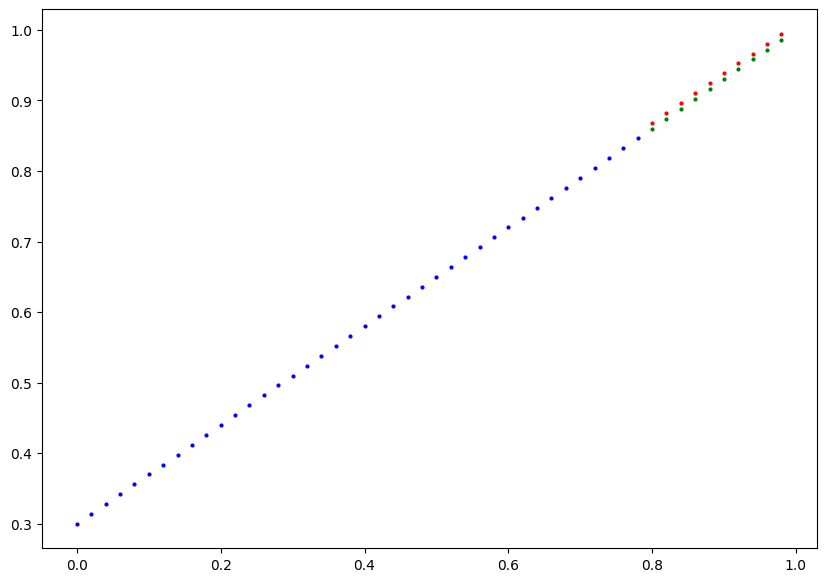

In [132]:
with torch.inference_mode():
    y_pred2 = model_0.forward(X_test)

plot_predictions(predictions=y_pred2)

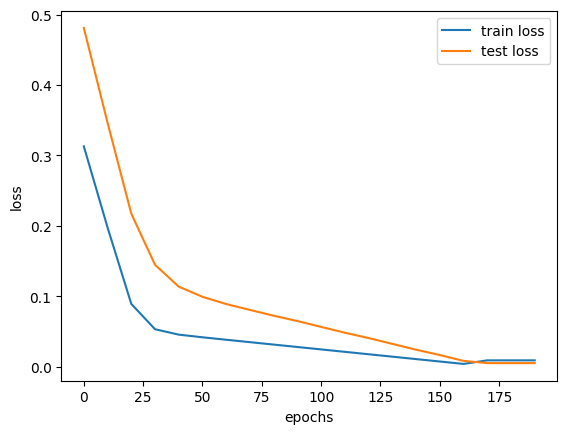

In [133]:
import numpy as np
plt.plot(epoch_values, np.array(torch.tensor(train_loss_values).numpy()), label= "train loss")
plt.plot(epoch_values, np.array(torch.tensor(test_loss_values).numpy()), label= "test loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend();

# Save model and loading model

There are three main methods you should know about saving and reloading model weights.
1. 'Torch.save()' - allows to store a model in pickle format
2. 'torch.load()' - allowsto load a pytorch model
3. 'torch.nn.module.load_state_dict()' - this allows to load a models saved state dictionary

In [134]:
from pathlib import Path

# Create a directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

# model path
MODEL_NAME = "linear-regression-model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save Model
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

In [135]:
# loading a model and making predictions
loaded_model = LinearRegressionClass()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [136]:
# make predictions with loaded model. This loaded model has the loaded wights
loaded_model.eval()
with torch.inference_mode():
    loaded_model_y_pred = loaded_model.forward(X_test)

# check if the intial predictions are same as the loaded model predictions 
y_pred2 == loaded_model_y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Improving the above code.

In the code above, the parameters like weights and bias were defined. However torch.nn module allows to develop different types of neural network layers that self implement these parameters. Below we will see the updated version of the linear regression class.

In [137]:
class LinearregressionClassV2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = torch.nn.Linear(in_features=1, out_features= 1)

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.linear_layer(x)

In [138]:
# set manaul_seed
torch.manual_seed(42)
model_1 = LinearregressionClassV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [139]:
loss_fn2 = torch.nn.L1Loss()

optim2 = torch.optim.SGD(params = model_1.parameters(), lr= 0.01)

In [140]:
# training loop
torch.manual_seed(42)

epochs = 200


# define list store values
epoch_values_2 = []
train_loss_values_2 = []
test_loss_values_2 = []

for epoch in range(epochs):
    # set model to train
    model_1.train()

    # forward pass
    model_1_y_pred = model_1.forward(X_train)

    # calclate the loss
    model_1_loss = loss_fn2(model_1_y_pred, y_train)

    # set zero grad
    optim2.zero_grad()

    # loss backwards
    model_1_loss.backward()

    # optimizer step
    optim2.step()

    # set to evaluation mode
    model_1.eval()
    with torch.inference_mode():
        model_1_test_pred = model_1.forward(X_test)

        model_1_test_loss = loss_fn2(model_1_test_pred, y_test)

    if epoch % 10 == 0:
        epoch_values_2.append(epoch)
        train_loss_values_2.append(model_1_loss)
        test_loss_values_2.append(model_1_test_loss)
        print(f"Epoch number : {epoch} | train loss : {model_1_loss} | test loss : {model_1_test_loss}")
        


Epoch number : 0 | train loss : 0.5551779866218567 | test loss : 0.5739762187004089
Epoch number : 10 | train loss : 0.4399680495262146 | test loss : 0.4392663538455963
Epoch number : 20 | train loss : 0.3247582018375397 | test loss : 0.30455657839775085
Epoch number : 30 | train loss : 0.20954827964305878 | test loss : 0.16984674334526062
Epoch number : 40 | train loss : 0.09433844685554504 | test loss : 0.03513689711689949
Epoch number : 50 | train loss : 0.023886386305093765 | test loss : 0.04784906655550003
Epoch number : 60 | train loss : 0.0199567973613739 | test loss : 0.04580312222242355
Epoch number : 70 | train loss : 0.016517987474799156 | test loss : 0.0375305712223053
Epoch number : 80 | train loss : 0.013089170679450035 | test loss : 0.029944902285933495
Epoch number : 90 | train loss : 0.009653178043663502 | test loss : 0.02167237363755703
Epoch number : 100 | train loss : 0.006215679459273815 | test loss : 0.014086711220443249
Epoch number : 110 | train loss : 0.0027872

In [141]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [142]:
weights, bias

(0.7, 0.3)

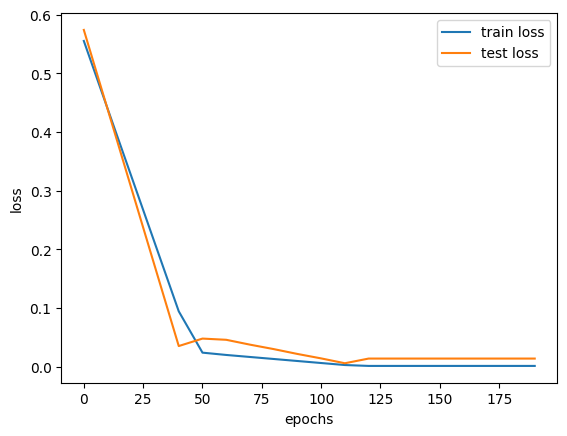

In [143]:
import numpy as np
plt.plot(epoch_values_2, np.array(torch.tensor(train_loss_values_2).numpy()), label= "train loss")
plt.plot(epoch_values_2, np.array(torch.tensor(test_loss_values_2).numpy()), label= "test loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend();

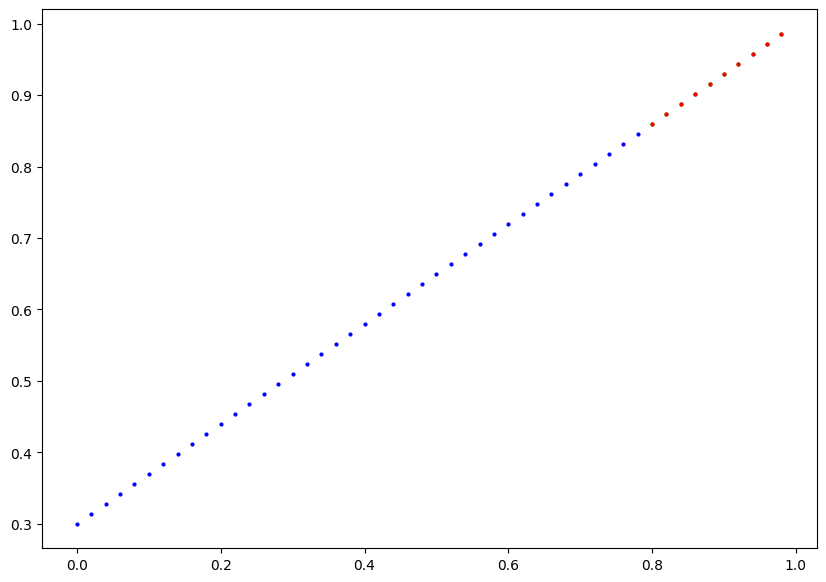

In [144]:
with torch.inference_mode():
    predictions_2 = model_1.forward(X_test)

plot_predictions(predictions=predictions_2)

# The above graph does is not showing the test data because of the overlap. In future early stopping and other techniques can be used to train the neural network layer better. 

### Summary:
1. The entire workbook explains the workflow of deep learning projects.
2. Get data - > Data pre-processing - > Data split - > Data visualisation - > Build model - > Train model -> Fine tune parameters - > Save model.




# Exercises

1.  Create a straight line dataset using the linear regression formula (weight * X + bias).
    * Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
    * Split the data into 80% training, 20% testing.
    * Plot the training and testing data so it becomes visual.
    
2. Build a PyTorch model by subclassing nn.Module.
    * Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
    * Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
    * Once you've constructed the model, make an instance of it and check its state_dict().
    * **Note**: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
    * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
    * Write a training loop to perform the appropriate training steps for 300 epochs.
    * The training loop should test the model on the test dataset every 20 epochs.

4. Make predictions with the trained model on the test data.
    * Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
    
5. Save your trained model's state_dict() to file.
    * Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
    * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [100]:
# Creating dataset
weight = 0.3
bias = 0.9

x = torch.arange(1,101,1).unsqueeze(dim=1)
y = weight * x + bias

In [101]:
# split into train and test set
train_split = int(0.8*(len(y)))

X_train, y_train = x[:train_split], y[:train_split]
X_test, y_test = x[train_split:], y[train_split:]

X_train = X_train.type(torch.float)
y_train = y_train.type(torch.float)
X_test = X_test.type(torch.float)
y_test = y_test.type(torch.float)

In [102]:
# visulising
def visualise(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data, train_labels, label = 'training data')

    plt.scatter(test_data, test_labels, label = 'test data')

    if predictions != None:
        plt.scatter(test_data, predictions, label = 'predictions')

In [103]:
# create a Pytorch model by subclassing nn.Module
class LinearRegressionAssessment(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_1 = torch.nn.Linear(in_features= 1, out_features=1).float()

    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.linear_layer_1(x)


In [104]:
# create an instance of the class
assessment_model = LinearRegressionAssessment()

# check the random wights and bias before training
assessment_model.state_dict()

OrderedDict([('linear_layer_1.weight', tensor([[-0.8165]])),
             ('linear_layer_1.bias', tensor([0.7475]))])

In [105]:
loss_assessment = torch.nn.L1Loss()

optim_assessment = torch.optim.SGD(params = assessment_model.parameters(), lr= 0.001, momentum=0.5)

In [113]:
# training loop
epochs = 300

# store values
epochs_values_assessment = []
train_loss_values_assessment = []
test_loss_values_assessment = []

for epoch in range(epochs):

    # set model to train
    assessment_model.train()

    # do the forward pass
    y_preds = assessment_model.forward(X_train)

    # calculate the loss
    train_loss = loss_assessment(y_preds, y_train)

    # reset optimizer gradients to zero_grad so that they do not accumulate
    optim_assessment.zero_grad()

    # calculate the loss backwards
    train_loss.backward()

    # take the optimizer step
    optim_assessment.step()
    

    # set model to evaluation for test
    assessment_model.eval()

    with torch.inference_mode():
        # make prediction on test data
        y_preds_test = assessment_model.forward(X_test)

        # calcualte the test loss
        test_loss = loss_assessment(y_preds_test, y_test)

    if epoch % 20 == 0 :
        print(f"epoch {epoch} | train loss : {train_loss} | test loss : {test_loss}")
        train_loss_values_assessment.append(train_loss.detach().numpy())
        test_loss_values_assessment.append(test_loss.detach().numpy())
        epochs_values_assessment.append(epoch)


epoch 0 | train loss : 1.3767460584640503 | test loss : 1.4503753185272217
epoch 20 | train loss : 1.1938159465789795 | test loss : 1.05843985080719
epoch 40 | train loss : 1.0606712102890015 | test loss : 0.7627952694892883
epoch 60 | train loss : 0.9557992815971375 | test loss : 0.5349305868148804
epoch 80 | train loss : 0.8634207844734192 | test loss : 0.33004751801490784
epoch 100 | train loss : 0.7710427045822144 | test loss : 0.12516602873802185
epoch 120 | train loss : 0.7152077555656433 | test loss : 0.007034492678940296
epoch 140 | train loss : 1.2932578325271606 | test loss : 1.2836215496063232
epoch 160 | train loss : 1.1536136865615845 | test loss : 0.9807294011116028
epoch 180 | train loss : 1.0487415790557861 | test loss : 0.7528630495071411
epoch 200 | train loss : 0.9563630819320679 | test loss : 0.547982394695282
epoch 220 | train loss : 0.8710963129997253 | test loss : 0.36009007692337036
epoch 240 | train loss : 0.8204485774040222 | test loss : 0.2515738606452942
epo

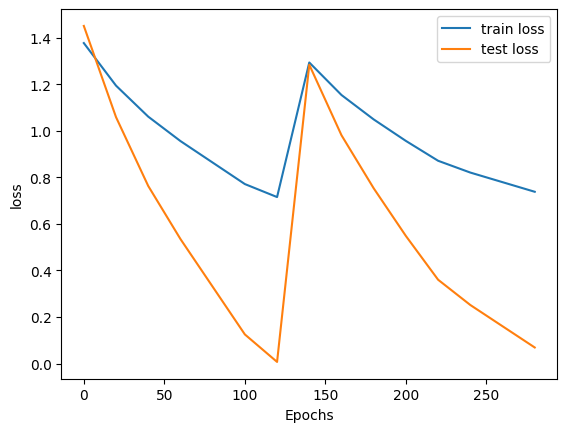

In [114]:
plt.plot(epochs_values_assessment, train_loss_values_assessment, label= "train loss")
plt.plot(epochs_values_assessment, test_loss_values_assessment, label = "test loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend();


In [115]:
assessment_model.state_dict()

OrderedDict([('linear_layer_1.weight', tensor([[0.2850]])),
             ('linear_layer_1.bias', tensor([0.8123]))])

In [116]:
with torch.inference_mode():
    preds = assessment_model(X_test)

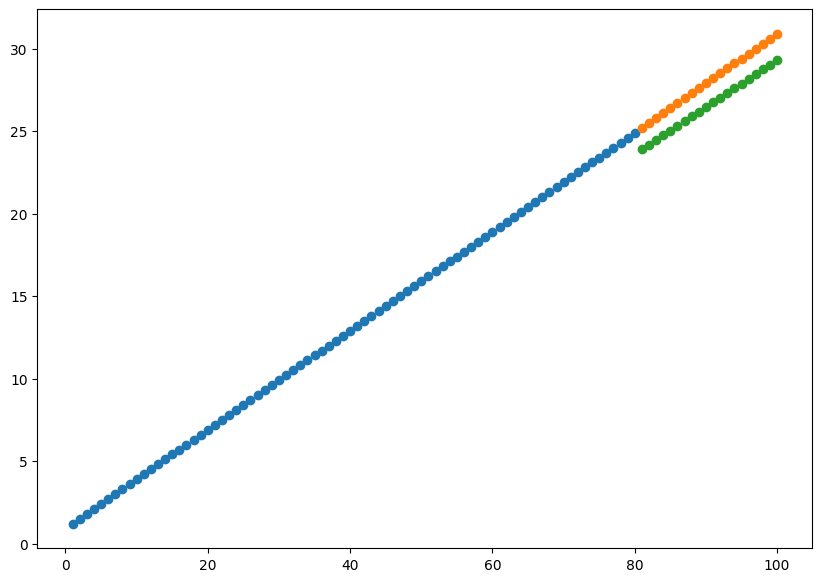

In [117]:
visualise(predictions=preds)

In [119]:
# save the weights because weight and bias are close to 0.3 and 0.9. The model can be improved further with hyper parameter optimisation

from pathlib import Path
# Create a directory 
MODEL_PATH = Path("models")

# model path
MODEL_NAME = "assessement-regression-model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save Model
torch.save(obj=assessment_model.state_dict(), f = MODEL_SAVE_PATH)